In [497]:
getwd()

[1] "/Users/patrickdorante/Desktop/trips_data/bikeData"

In [2]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
# # # # # # # # #  Install janitor and lubridate packages for cleaning and date functions # # # # # # # # # 
# # # # # # # # #  skimr summarizes statistics about columns in a data frame              # # # # # # # # # 
# # # # # # # # #  tidyverse for data import and wrangling                                # # # # # # # # # 
# # # # # # # # #  readr for reading rectangular data                                     # # # # # # # # # 
# # # # # # # # #  ggplot for visualization                                               # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # ## # # # # # # # ## # # # # # # # #

In [3]:
install.packages('janitor')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages('lubridate')

In [ ]:
install.packages('dtplyr')

In [8]:
library(tidyverse)
library(skimr)
library(dplyr)
library(dtplyr)
library(lubridate)
library(janitor)
library(tidyr)
library(tibble)
library(stringr)
library(readr)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Attaching package: ‘janitor’

The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [9]:
#--------------------------------------------------------------------------------
# STEP # 1 EXPECTATION: COLLECTION AND LOAD OF DATA FROM APRIL 2004 - MAY 2021
#--------------------------------------------------------------------------------

In [10]:
trip202004 <- read_csv('202004-divvy-tripdata.csv')
trip202005 <- read_csv('202005-divvy-tripdata.csv')
trip202006 <- read_csv('202006-divvy-tripdata.csv')
trip202007 <- read_csv('202007-divvy-tripdata.csv')
trip202008 <- read_csv('202008-divvy-tripdata.csv')
trip202009 <- read_csv('202009-divvy-tripdata.csv')
trip202010 <- read_csv('202010-divvy-tripdata.csv')
trip202011 <- read_csv('202011-divvy-tripdata.csv')
trip202012 <- read_csv('202012-divvy-tripdata.csv')

Rows: 84776 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 200274 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 343005 Columns: 13── Column specification ─────────────────────────

In [11]:
trip202101 <- read_csv('202101-divvy-tripdata.csv')
trip202102 <- read_csv('202102-divvy-tripdata.csv')
trip202103 <- read_csv('202103-divvy-tripdata.csv')
trip202104 <- read_csv('202104-divvy-tripdata.csv')
trip202105 <- read_csv('202105-divvy-tripdata.csv')


Rows: 96834 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 49622 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 228496 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_i

In [12]:
#--------------------------------------------------------------------------
# STEP # 2 EXPECTATION: COMBINE OR MERGE ALL THE DATA TO A SINGLE FILE
#--------------------------------------------------------------------------

In [13]:
riders_trip <- rbind(trip202004, trip202005, trip202006, trip202007,
               trip202008, trip202009, trip202010, trip202011, 
               trip202012, trip202101, trip202102, trip202103, 
               trip202104, trip202105)

In [14]:
# View table or data frame
head(riders_trip)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


In [16]:
## Summary and preview of the new dataset
glimpse(riders_trip)


Rows: 4,358,611
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

In [18]:
## Remove variable types of start_lat, start_lng, end_lat, end_lng, start_station_id , end_station_id
rides_taken <- riders_trip %>% 
         select (-c(start_lat, 
                 start_lng, end_lat, 
                 end_lng, start_station_id, 
                 end_station_id))

In [19]:
 rides_taken <- rides_taken %>% # filter and reassign column names 
 rename(pickup_station = start_station_name,
        dropoff_station = end_station_name)

In [20]:
head(rides_taken)

ride_id,rideable_type,started_at,ended_at,pickup_station,dropoff_station,member_casual
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member


In [21]:
nrow(rides_taken)  # Count the number of rows are in the data frame?
dim(rides_taken)  # Provide the dimensions of the data frame?

[1] 4358611

[1] 4358611       7

In [22]:
colSums(is.na(rides_taken)) # How many missing values each columns have in data frame?

ride_id   rideable_type      started_at        ended_at  pickup_station 
              0               0               0               0          201975 
dropoff_station   member_casual 
         229610               0

In [200]:
# Count numbers of annual members and casual users and bike types
table(rides_taken$rideable_type)  # 1st. method

rides_taken %>%                  # 2nd method data cleaning
  count(member_casual) 




 classic_bike   docked_bike electric_bike 
       843585       2626536        888490 

member_casual,n
casual,1823893
member,2534718


In [ ]:
#---------------------------------------------------------------------------------------------------------------
# STEP # 3 EXPECTATION: TRANSFORMING DATA - CONVERTING DATE TO DATE-TIME TYPES    
#---------------------------------------------------------------------------------------------------------------

In [382]:
rides_taken$date <- as.Date(rides_taken$started_at) # format is yyyy-mm-dd
#rides_taken$day <- format(as.Date(rides_taken$date), "%d")   # format is Monday-Sunday
rides_taken$month <- format(as.Date(rides_taken$date), "%B") # Format is January-December
rides_taken$year <- format(as.Date(rides_taken$date), "%Y")  # format is 2000-2021
rides_taken$weekDays <- format(as.Date(rides_taken$date), "%A")
rides_taken$datetime_start <- format(rides_taken$started_at, format = "%H:%M")
rides_taken$datetime_start <- as.POSIXct(rides_taken$datetime_start, format = "%H:%M")

In [384]:
# Add ride duration by calculating the time difference between start and end session in seconds
rides_taken$duration <- difftime(rides_taken$ended_at, rides_taken$started_at, units = "mins")

In [385]:
# Convert ride time seconds from Factor to numeric and run calculations on the data
is.factor(rides_taken$duration)
rides_taken$duration <- as.numeric(as.character(rides_taken$duration))
is.numeric(rides_taken$duration)
# Add ride duration by calculating the time difference between start and end session in seconds
rides_taken$duration <- difftime(rides_taken$ended_at, rides_taken$started_at, units = "mins")

[1] FALSE

[1] TRUE

In [380]:
#checking for hours and minutes used to complete the ride
rides_taken$time_length <- hms::as_hms(rides_taken$)

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 4 EXPECTATION: MISSING AND NULL VALUES DATA - REMOVE BLANKS, MISSING AND NEGATIVE VALUES IN THE DATASETS 
#-----------------------------------------------------------------------------------------------------------------

In [387]:
# Drop all the missing NA and negative NAN values with a new version dataframe
rides_taken_v2 <- rides_taken[complete.cases(rides_taken),]

In [391]:
# Drop all the missing and negative values
rides_taken_v2 <- rides_taken_v2[!(rides_taken_v2$duration < 0),]

In [392]:
colSums(is.na(rides_taken_v2)) # Check for any missing NA and NaN values

ride_id   rideable_type      started_at        ended_at  pickup_station 
              0               0               0               0               0 
dropoff_station   member_casual            date           month            year 
              0               0               0               0               0 
       weekDays        duration  datetime_start     time_length 
              0               0               0               0

In [393]:
table(rides_taken$member_casual) # Data cleaning after preparation and analysis.

# 2nd. method compare old data.frame to new data.frame has fewer number of members
rides_taken_v2 %>%
count(member_casual)


 casual  member 
1823893 2534718 

member_casual,n
casual,1685735
member,2348570


In [413]:
rides_taken_v3 <- rides_taken_v2 %>%      # data cleansing for a new data.frame
                     select(-c(ride_id, 
                               started_at, ended_at, 
                               dropoff_station, date))

In [557]:
glimpse(rides_taken_v3)

Rows: 4,034,305
Columns: 9
$ rideable_type  <chr> "docked_bike", "docked_bike", "docked_bike", "docked_bi…
$ pickup_station <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClurg C…
$ member_casual  <chr> "member", "member", "member", "member", "casual", "memb…
$ month          <ord> April, April, April, April, April, April, April, April,…
$ year           <chr> "2020", "2020", "2020", "2020", "2020", "2020", "2020",…
$ weekDays       <ord> Sunday, Friday, Wednesday, Tuesday, Saturday, Thursday,…
$ duration       <drtn> 26.816667 mins, 8.150000 mins, 14.383333 mins, 12.2000…
$ datetime_start <dttm> 2022-04-20 17:45:00, 2022-04-20 17:08:00, 2022-04-20 1…
$ time_length    <time> 00:26:49.000000, 00:08:09.000000, 00:14:23.000000, 00:…


In [415]:
# write_csv(rides_taken_v2, '2020_2021rides_taken.csv') # Create a csv file for the new data frame for further analysis

In [416]:
rides_taken_v3$weekDays <- ordered(rides_taken_v3$weekDays,  # Orderly days of the week
                                   levels=c("Monday", "Tuesday", 
                                             "Wednesday", "Thursday", 
                                             "Friday", "Saturday", "Sunday"))

In [417]:
rides_taken_v3$month <- ordered(rides_taken_v3$month, # Orderly month of the year
                                levels=c("January", "February", "March", 
                                         "April", "May", "June",
                                         "July", "August", "September", 
                                         "October", "November", "December"))

In [418]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 5 EXPECTATION: CONDUCT STATISTICAL ANALYSIS
#-----------------------------------------------------------------------------------------------------------------

In [419]:
casual <- rides_taken_v3[rides_taken_v3$member_casual == "casual",] %>%
              select(pickup_station, weekDays, 
                     month, member_casual, 
                     duration, datetime_start)  # Extract data only from casual users

head(casual)

# Members
member <- rides_taken_v3[rides_taken_v3$member_casual == "member",] %>%  # Extract data only from member riders
                  select(pickup_station, 
                         weekDays, month, 
                         member_casual, duration, 
                         datetime_start)

head(member)


pickup_station,weekDays,month,member_casual,duration,datetime_start
Rush St & Hubbard St,Saturday,April,casual,52.916667 mins,2022-04-20 10:22:00
Ogden Ave & Roosevelt Rd,Tuesday,April,casual,75.816667 mins,2022-04-20 12:22:00
LaSalle Dr & Huron St,Wednesday,April,casual,5.733333 mins,2022-04-20 10:30:00
Leavitt St & Archer Ave,Saturday,April,casual,8.216667 mins,2022-04-20 02:59:00
Clark St & Lincoln Ave,Saturday,April,casual,15.916667 mins,2022-04-20 10:52:00
Museum of Science and Industry,Sunday,April,casual,35.983333 mins,2022-04-20 15:39:00


pickup_station,weekDays,month,member_casual,duration,datetime_start
Eckhart Park,Sunday,April,member,26.816667 mins,2022-04-20 17:45:00
Drake Ave & Fullerton Ave,Friday,April,member,8.150000 mins,2022-04-20 17:08:00
McClurg Ct & Erie St,Wednesday,April,member,14.383333 mins,2022-04-20 17:54:00
California Ave & Division St,Tuesday,April,member,12.200000 mins,2022-04-20 12:50:00
Mies van der Rohe Way & Chicago Ave,Thursday,April,member,5.400000 mins,2022-04-20 17:55:00
Streeter Dr & Grand Ave,Thursday,April,member,5.216667 mins,2022-04-20 14:47:00


In [420]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 6 EXPECTATION: FIND THE WEEKLY AND MONTHLY MEAN, MAX AND MEDIAN
#-----------------------------------------------------------------------------------------------------------------

In [421]:
# Inspect the daily average duration for members vs casual users

aggregate(rides_taken_v3$duration~rides_taken_v3$member_casual + 
          rides_taken_v3$weekDays, FUN = mean)

rides_taken_v3$member_casual,rides_taken_v3$weekDays,rides_taken_v3$duration
casual,Monday,43.80656
member,Monday,14.86941
casual,Tuesday,40.04041
member,Tuesday,14.70481
casual,Wednesday,39.85545
member,Wednesday,14.75541
casual,Thursday,41.47490
member,Thursday,14.71136
casual,Friday,42.43567
member,Friday,15.22194


In [422]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 7 EXPECTATION: COMPARE THE MEAN, MAX, MIN, AND MEDIAN FOR MEMBER VS CASUAL USERS
#-----------------------------------------------------------------------------------------------------------------

In [550]:
skim(rides_taken_v3)

── Data Summary ────────────────────────
                           Values        
Name                       rides_taken_v3
Number of rows             4034305       
Number of columns          9             
_______________________                  
Column type frequency:                   
  POSIXct                  1             
  character                4             
  difftime                 2             
  factor                   2             
________________________                 
Group variables            None          

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate min                 max                
1 datetime_start         0             1 2022-04-20 00:00:00 2022-04-20 23:59:00
  median              n_unique
1 2022-04-20 15:28:00     1440

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate   min   max empty n_unique

In [423]:
 rides_taken_v3 %>%   # Statistical comparison between members vs casual users
    group_by(member_casual) %>%
    summarise(min_ride_length = min(duration), 
              max_ride_length = max(duration),
              median_ride_length = median(duration), 
              avg_trip_length = mean(duration))

member_casual,min_ride_length,max_ride_length,median_ride_length,avg_trip_length
casual,0 mins,55683.88 mins,21.18333 mins,44.19577 mins
member,0 mins,58720.03 mins,11.38333 mins,15.64780 mins


In [424]:
median_duration <- median(rides_taken_v3$duration)/60  # median duration in seconds
cat("***** The median duration per ride is", median_duration, "seconds. *****")



***** The median duration per ride is 0.2422222 seconds. *****

In [425]:
max_duration <- max(rides_taken_v3$duration)/60  # mean duration in seconds
cat("***** The max duration per ride is", max_duration, "seconds. *****")

***** The max duration per ride is 978.6672 seconds. *****

In [549]:
mean_duration <- mean(rides_taken_v3$duration)/60 # mean duration
cat("***** The mean duration per ride is", mean_duration, "seconds. *****")


***** The mean duration per ride is 0.4596096 seconds. *****

In [427]:
rides_taken_viz <- rides_taken_v3 
head(rides_taken_viz)

rideable_type,pickup_station,member_casual,month,year,weekDays,duration,datetime_start,time_length
docked_bike,Eckhart Park,member,April,2020,Sunday,26.81667 mins,2022-04-20 17:45:00,00:26:49
docked_bike,Drake Ave & Fullerton Ave,member,April,2020,Friday,8.15000 mins,2022-04-20 17:08:00,00:08:09
docked_bike,McClurg Ct & Erie St,member,April,2020,Wednesday,14.38333 mins,2022-04-20 17:54:00,00:14:23
docked_bike,California Ave & Division St,member,April,2020,Tuesday,12.20000 mins,2022-04-20 12:50:00,00:12:12
docked_bike,Rush St & Hubbard St,casual,April,2020,Saturday,52.91667 mins,2022-04-20 10:22:00,00:52:55
docked_bike,Mies van der Rohe Way & Chicago Ave,member,April,2020,Thursday,5.40000 mins,2022-04-20 17:55:00,00:05:24


In [428]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 8 VISUALIZATION: COMPARING NUMBER AND AVERAGE OF TRIPS FOR BOTH MEMBER AND CASUAL USERS
#-----------------------------------------------------------------------------------------------------------------

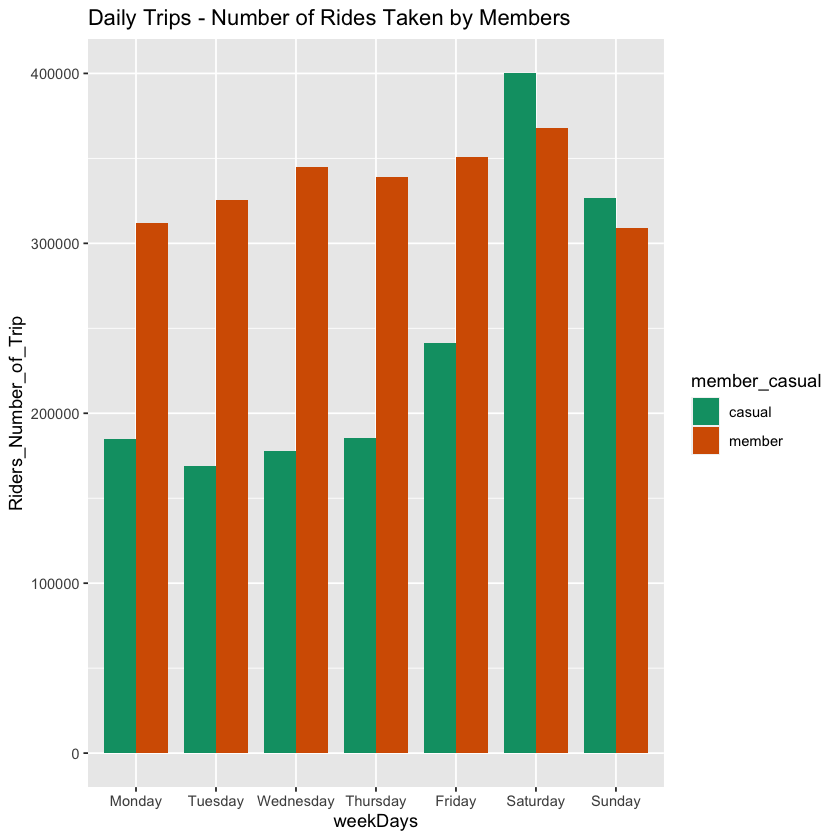

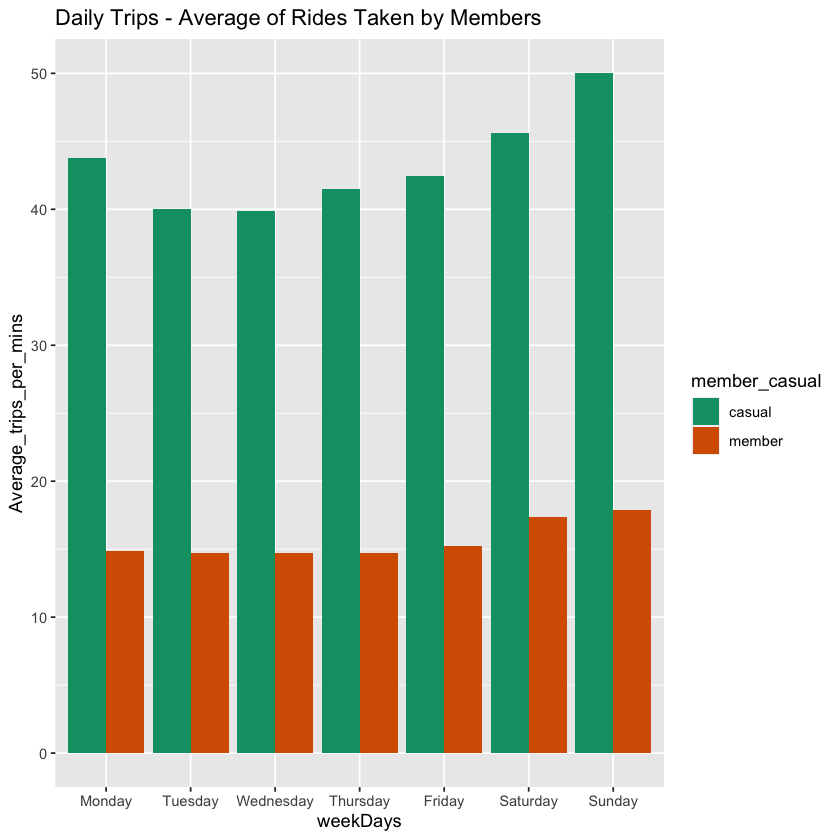

In [429]:
# Data visualization - number of rides per users  

number_of_trip_viz <- rides_taken_viz %>% 
                        group_by(member_casual, weekDays) %>% # group_by
                        summarise(Riders_Number_of_Trip = n(), .groups="drop") %>% # ggplot
                        ggplot(aes(x = weekDays, y = Riders_Number_of_Trip, fill = member_casual))+
                        geom_col(width=0.8, position = position_dodge(width=0.8))+
                        labs(title="Daily Trips - Number of Rides Taken by Members")+
                        scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
                        scale_fill_manual(values=c("#009E73", "#D55E00"))

number_of_trip_viz # member & casual users - number of rides
                                           
# =====================================================================================================
#  # Daily Usage: Average of trips taken by members per day                                          
# =====================================================================================================  
                                           
average_of_trip_viz <- rides_taken_viz %>% 
                      group_by(member_casual, weekDays) %>% 
                      summarise(Average_trips_per_mins = mean(duration), .groups="drop") %>%
                      ggplot(aes(x = weekDays, y = Average_trips_per_mins,fill = member_casual))+
                      geom_bar(position="dodge", stat = "identity")+
                      labs(title="Daily Trips - Average of Rides Taken by Members")+
                      scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
                      scale_fill_manual(values=c("#009E73", "#D55E00"))
                    
average_of_trip_viz # Viz Outcome                                        

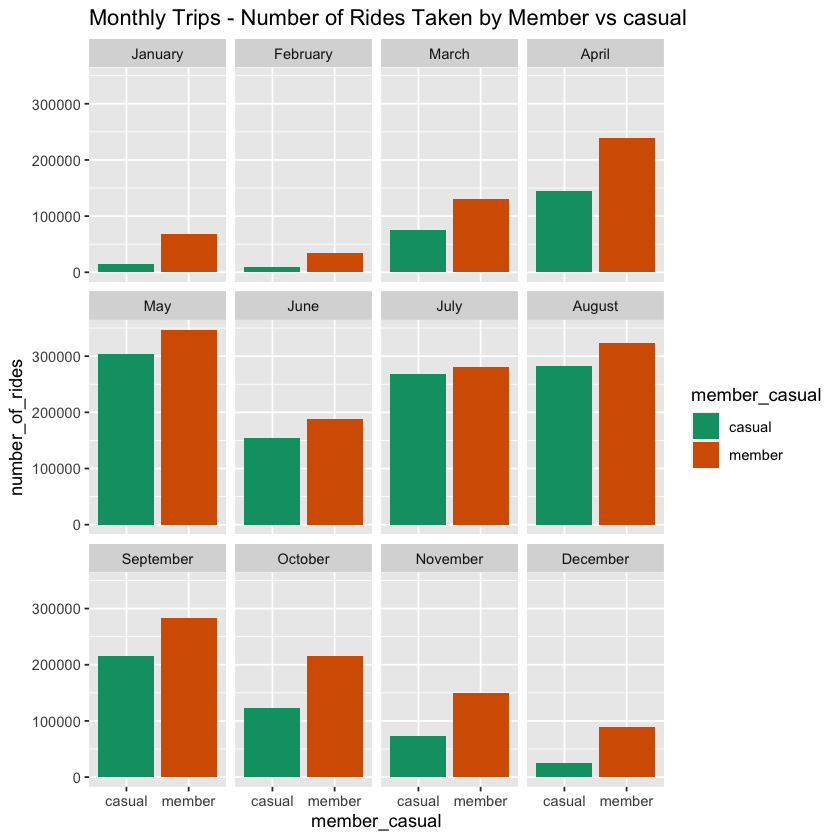

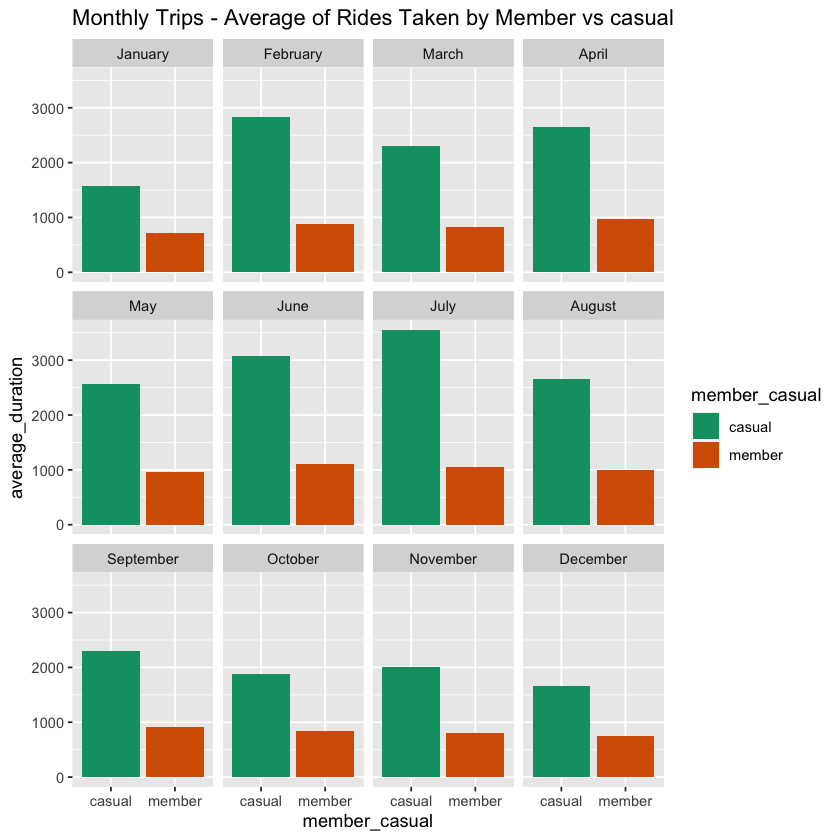

In [506]:
# Data visualization - Number of trips taken by member vs casual per month

plot_month_viz <- rides_taken_viz %>%
                    group_by(member_casual, month) %>% 
                    summarise(number_of_rides = n(), 
                    average_duration = mean(duration), .groups="drop") %>%
                    ggplot(mapping=aes(x = member_casual, 
                    y = number_of_rides, fill = member_casual)) +
                    geom_bar(position="dodge2", stat = "identity") +
                    labs(title="Monthly Trips - Number of Rides Taken by Member vs casual")+
                    facet_wrap(~month) +
                    scale_y_continuous(
                    labels = function(x) format(x, scientific = FALSE))+
                    scale_fill_manual(values=c("#009E73", "#D55E00"))
                    
plot_month_viz # monthly viz
                        
                        
# =====================================================================================================
#  # Monthly Usage: Average of trips taken by member vs casual                                        
# =====================================================================================================                         
                                      
avg_month_viz <- rides_taken_viz %>%
                    group_by(member_casual, month) %>% 
                    summarise(average_duration = mean(time_length), .groups="drop") %>%
                    ggplot(mapping=aes(x = member_casual, 
                    y = average_duration, fill = member_casual)) +
                    geom_bar(position="dodge", stat = "identity") +
                    labs(title="Monthly Trips - Average of Rides Taken by Member vs casual")+
                    facet_wrap(~month) +
                    scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
                    scale_fill_manual(values=c("#009E73", "#D55E00"))
                    
avg_month_viz # viz                        
                                        


In [431]:
head(rides_taken_viz)

rideable_type,pickup_station,member_casual,month,year,weekDays,duration,datetime_start,time_length
docked_bike,Eckhart Park,member,April,2020,Sunday,26.81667 mins,2022-04-20 17:45:00,00:26:49
docked_bike,Drake Ave & Fullerton Ave,member,April,2020,Friday,8.15000 mins,2022-04-20 17:08:00,00:08:09
docked_bike,McClurg Ct & Erie St,member,April,2020,Wednesday,14.38333 mins,2022-04-20 17:54:00,00:14:23
docked_bike,California Ave & Division St,member,April,2020,Tuesday,12.20000 mins,2022-04-20 12:50:00,00:12:12
docked_bike,Rush St & Hubbard St,casual,April,2020,Saturday,52.91667 mins,2022-04-20 10:22:00,00:52:55
docked_bike,Mies van der Rohe Way & Chicago Ave,member,April,2020,Thursday,5.40000 mins,2022-04-20 17:55:00,00:05:24


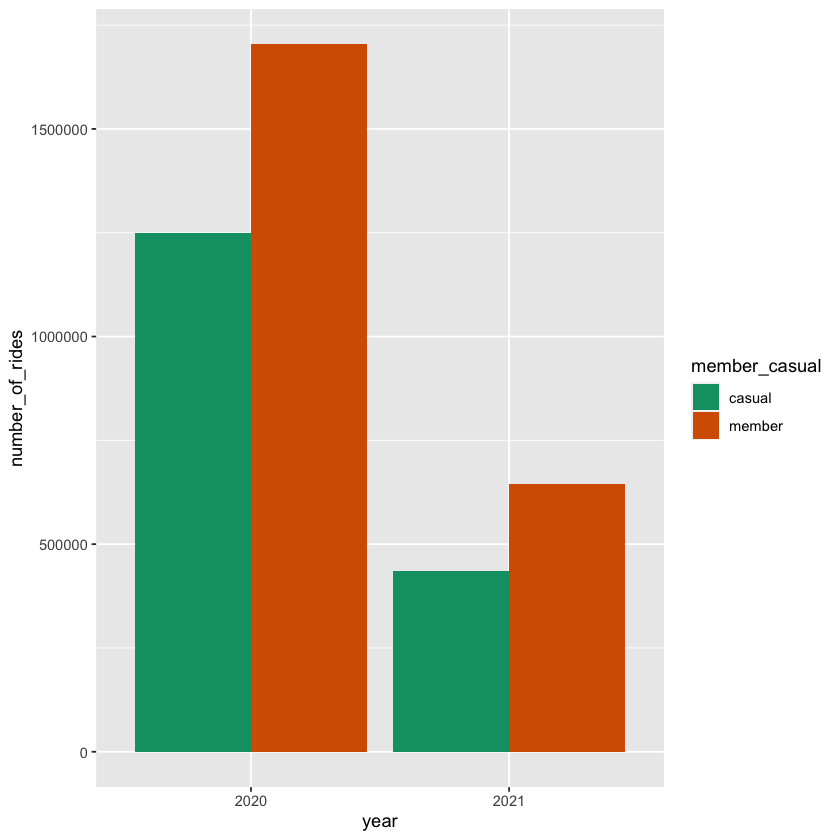

In [432]:
plot_years_viz <- rides_taken_v3 %>%         # viz for years of 2020 vs 2021
                    group_by(member_casual, year) %>% 
                    summarise(number_of_rides = n(), .groups="drop") %>%
                    ggplot(aes(x = year, y = number_of_rides, 
                    fill = member_casual))+
                    geom_bar(position="Dodge", stat = "identity") +
                    scale_y_continuous(
                    labels = function(x) format(x, scientific = FALSE)) +
                    scale_fill_manual(values=c("#009E73", "#D55E00"))

                    
plot_years_viz  # years plot

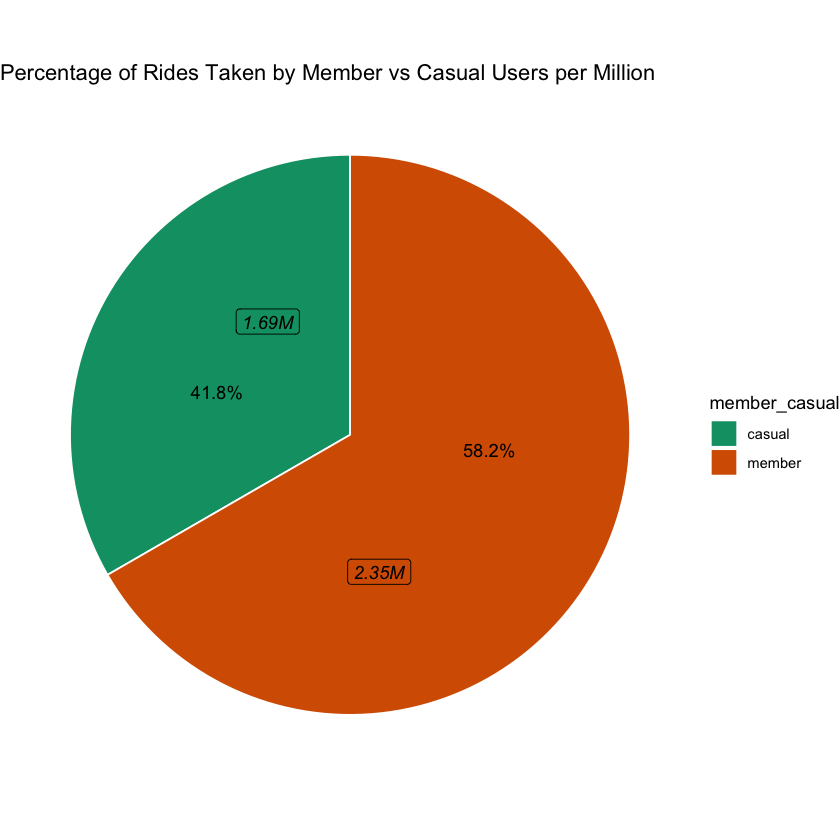

In [433]:
pie_viz <- rides_taken_v3 %>% # Percentage rides from both users
               group_by(member_casual) %>%
               summarise(total = n()) %>%
               mutate(percentage = percent(total/sum(total))) %>%
               mutate( Average_of_members = member_casual) %>%
               ggplot(aes(x="", y=Average_of_members, fill=member_casual))+
               geom_col(color="white") +
               labs(title="Percentage of Rides Taken by Member vs Casual Users per Million")+
               geom_label(aes(label = paste0(round(total/1000000, 2), "M"), fill = member_casual), 
               position = position_stack(vjust = 0.7),
               colour = "black", fontface='italic', show.legend = FALSE)+
               geom_text(aes(label = percentage), position = position_stack(vjust = 0.4))+
               scale_fill_manual(values=c("#009E73", "#D55E00"))+
               coord_polar(theta = "y")+
               theme_void()


pie_viz # viz percent

In [556]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 9 SAVE PLOTS AND GRAPH
#-----------------------------------------------------------------------------------------------------------------
 #ggsave('Days_of_week.png', plot_wkday_viz, width = 15, height=10)
 #ggsave('percent_usrs.png', pie_viz, width = 15, height=10)
 #ggsave('datetime.png', plot_time_day, width = 15, height=10)
 #ggsave('time_month.png', plot_time_month, width = 15, height=10)
 ggsave('avg_trips.png', average_of_trip_viz, width = 15, height=10)
 #ggsave('number_trips.pnd', num_of_trip_viz, width = 15, height=10)

In [559]:
str(rides_taken_viz)

tibble [4,034,305 × 9] (S3: tbl_df/tbl/data.frame)
 $ rideable_type : chr [1:4034305] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ pickup_station: chr [1:4034305] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ member_casual : chr [1:4034305] "member" "member" "member" "member" ...
 $ month         : Ord.factor w/ 12 levels "January"<"February"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ year          : chr [1:4034305] "2020" "2020" "2020" "2020" ...
 $ weekDays      : Ord.factor w/ 7 levels "Monday"<"Tuesday"<..: 7 5 3 2 6 4 4 2 3 6 ...
 $ duration      : 'difftime' num [1:4034305] 26.8166666666667 8.15 14.3833333333333 12.2 ...
  ..- attr(*, "units")= chr "mins"
 $ datetime_start: POSIXct[1:4034305], format: "2022-04-20 17:45:00" "2022-04-20 17:08:00" ...
 $ time_length   : 'hms' num [1:4034305] 00:26:49 00:08:09 00:14:23 00:12:12 ...
  ..- attr(*, "units")= chr "secs"


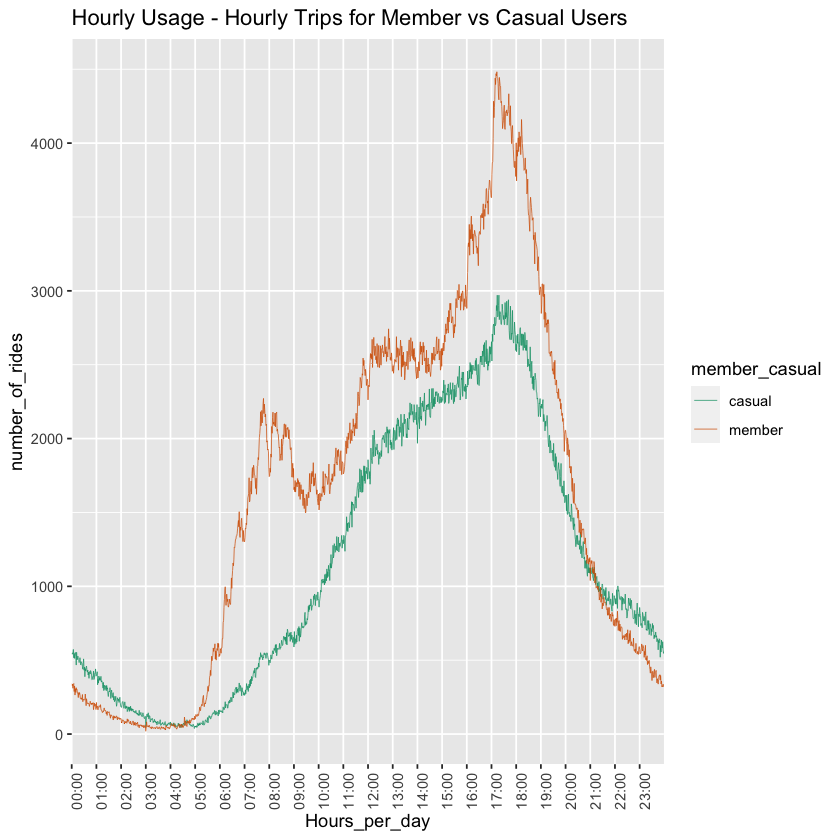

In [542]:
plot_time_day <- rides_taken_viz %>%   # Viz hourly spending time  
                      group_by(member_casual, datetime_start) %>% 
                      summarise(number_of_rides = n(), Hours_per_day =datetime_start, .groups="drop") %>%
                      ggplot(aes(x = Hours_per_day, 
                      y = number_of_rides, color = member_casual, 
                      group = member_casual)) +
                      geom_line(size = .2) +
                      labs(title="Hourly Usage - Hourly Trips for Member vs Casual Users")+
                      scale_x_datetime(date_breaks = "1 hour", 
                      minor_breaks = NULL,
                      date_labels = "%H:%M", expand = c(0,0))+
                      theme(axis.text.x = element_text(angle = 90))+
                      scale_colour_manual(values=c("#009E73", "#D55E00"))

 
plot_time_day ## viz



In [525]:
library(scales)

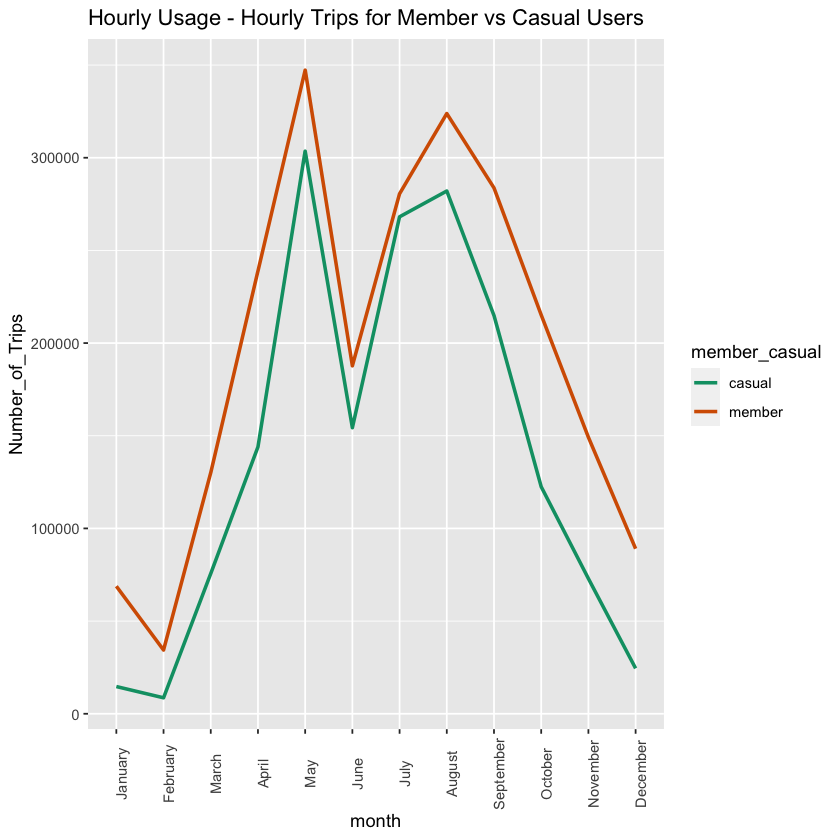

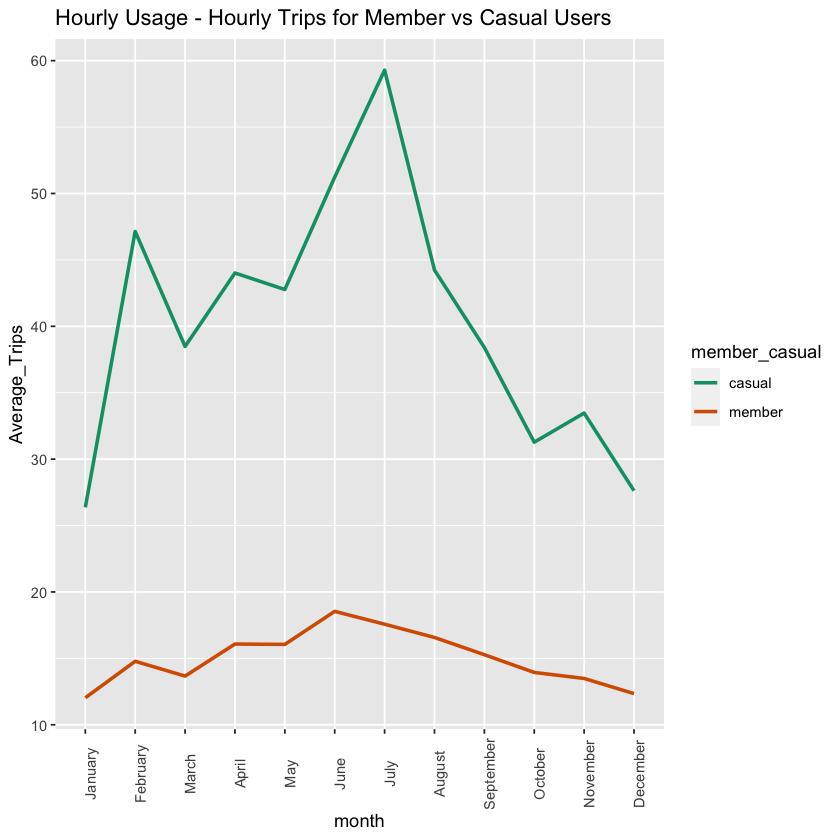

In [555]:
num_time_month <- rides_taken_viz %>%   # Viz hourly spending time  
                      group_by(member_casual, month) %>% 
                      summarise(Number_of_Trips = n(), .groups="drop") %>%
                      ggplot(aes(x = month, 
                      y = Number_of_Trips, color = member_casual, 
                      group = member_casual)) +
                      geom_line(size = 1) +
                      labs(title="Hourly Usage - Hourly Trips for Member vs Casual Users")+
                      theme(axis.text.x = element_text(angle = 90))+
                      scale_y_continuous(
                      labels = function(x) format(x, scientific = FALSE)) +
                      scale_colour_manual(values=c("#009E73", "#D55E00"))

 
num_time_month ## vi



                        
# =====================================================================================================
#  # Monthly Trips: Numbers & Average of trips taken by member vs casual                                        
# =====================================================================================================


average_time_month <- rides_taken_viz %>%   # Viz hourly spending time  
                      group_by(member_casual, month) %>% 
                      summarise(Average_Trips = mean(duration), .groups="drop") %>%
                      ggplot(aes(x = month, 
                      y = Average_Trips, color = member_casual, 
                      group = member_casual)) +
                      geom_line(size = 1) +
                      labs(title="Hourly Usage - Hourly Trips for Member vs Casual Users")+
                      theme(axis.text.x = element_text(angle = 90))+
                      scale_y_continuous(
                      labels = function(x) format(x, scientific = FALSE)) +
                      scale_colour_manual(values=c("#009E73", "#D55E00"))

 
average_time_month ## vi

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 10 - SAVE ALL THE DATA TO A CSV FILE
#-----------------------------------------------------------------------------------------------------------------

In [495]:
# Create a new csv file to visualize in Excel, Tableau, or presentation 
#write.csv(rides_taken_viz, "data_clean_chicago_bikes.csv") 
